<a href="https://colab.research.google.com/github/JohanCala/Eighth-Semester/blob/main/SegundoParcialAnaliticaDeDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Parcial Analitica De Datos 

### Hecho por Johan E. Cala y Mario E. Hurtado

In [ ]:
pip install wfdb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Librerias Necesarias Para Resolver el parcial 

In [ ]:
import wfdb 
import random
import statistics as stats
from scipy.stats import kurtosis
from scipy.stats import skew
import math
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statistics import mode

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [119]:
def modaJC(test_list):
  res = []
  test_list1 = Counter(test_list) 
  temp = test_list1.most_common(1)[0][1] 
  for ele in test_list:
    if test_list.count(ele) == temp:
      res.append(ele)
  res = list(set(res))
  return res

## Formacion de DataSets  

Para recolectar la información necesaria se utilizo una base datos de series temporales la cual es [MIT-BIH Normal Sinus Rhythm Database](https://www.physionet.org/content/nsrdb/1.0.0/), donde a traves de ventanas deslizantes se puede recorrer las señales en busca de caracteristica las cuales se decidieron que fueran:   
1.  pendiente  
2.  media  
3.  mediana  
4.  moda  
5.  varianza  
6.  desviacionEstandar  
7.  kurtosis   
8.  asimetria

El codigo ejecutado para sacar los datos de toda la señal fue el siguiente:


```
#Lista de registros

registros = ['16265','16272','16273','16420','16483','16539','16773',
             '16786','16795','17052','17453',
             '18177','18184','19088','19090',
             '19093','19140','19830']
info_data = []             
N_1 = 10
N_0 = 10
y_0 = 0
y_1 = 1

for i in registros:
  
  ruta = "db/"+i
  print(ruta)
  records = wfdb.rdrecord(ruta)
  signal = records.p_signal
  signal1 = signal[:,0]
  signal2 = signal[:,1]
  ann = wfdb.rdann(ruta,'atr') #etiquetas del evento
  ANN = ann.sample
  print(len(ANN))
  for x in range(1,len(ANN)-1):

    REGISTRO1 = signal1[ANN[x]-N_1:ANN[x]+N_1]
    y1=np.amin(REGISTRO1)
    y2=np.amax(REGISTRO1)
    x1 = np.where(REGISTRO1 == y1)[0][0]
    x2 = np.where(REGISTRO1 == y2)[0][0]
    pendiente = y2 - y1 / x2 - x1
    media = stats.mean(REGISTRO1)
    mediana = stats.median(REGISTRO1)
    moda = modaJC(list(REGISTRO1))
    varianza = stats.pvariance(REGISTRO1)
    desviacionEstandar = stats.pstdev(REGISTRO1)
    kurt = kurtosis(REGISTRO1)
    asime = skew(REGISTRO1)
    caract_1 = [pendiente,media,mediana,moda,varianza,desviacionEstandar,kurt,asime,y_1]
    info_data.append(caract_1)
  
    #No latidos
    n_aux = 8 
    REGISTRO2 = signal1[ANN[x]+n_aux:ANN[x+1]-n_aux]
    
    options = range(len(REGISTRO2)+1)
    options= list(options)
    if len(REGISTRO2) > 30:
      aux = True
      while aux == True:
          r = random.choice(options)
          if r - N_0 > 0 and r + N_0 < len(REGISTRO2):
            aux = False
      inicio = r - N_0 
      final = r + N_0
      REGISTRO0 = REGISTRO2[inicio:final]
    else:
      n_aux = 3
      REGISTRO0 = signal1[ANN[x]:ANN[x+1]]


    y1=np.amin(REGISTRO0)
    y2=np.amax(REGISTRO0)
    x1 = np.where(REGISTRO0 == y1)[0][0]
    x2 = np.where(REGISTRO0 == y2)[0][0]
    pendiente = y2 - y1 / x2 - x1
    media = stats.mean(REGISTRO0)
    mediana = stats.median(REGISTRO0)
    moda = modaJC(list(REGISTRO0))
    varianza = stats.pvariance(REGISTRO0)
    desviacionEstandar = stats.pstdev(REGISTRO0)
    kurt = kurtosis(REGISTRO2)
    asime = skew(REGISTRO2)
    caract_0 = [pendiente,media,mediana,moda,varianza,desviacionEstandar,kurt,asime,y_0]
    info_data.append(caract_0)
```

Esto como resultado nos dio el dataset para trabajarlo en los siguientes numerales del parcial 











In [127]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DatosMIT-BIH.csv')
df

,pendiente,media,mediana,moda,varianza,desviacionEstandar,kurtosis,asimetria,salida
0,-5.253750,0.2545,-0.195,-0.155,1.132965,1.064408,0.529401,1.436697,1
1,-0.051562,-0.1475,-0.155,-0.175,0.001529,0.039099,0.832477,-0.537550,0
2,-5.002083,0.2755,-0.180,-0.175,1.178025,1.085368,0.844009,1.516941,1
3,-2.062500,-0.1215,-0.115,-0.115,0.000813,0.028509,0.519649,-0.472923,0
4,-5.074583,0.3010,-0.160,-0.155,1.176754,1.084783,0.554570,1.437265,1
...,...,...,...,...,...,...,...,...,...
3613507,-18.007500,-0.2760,-0.305,-0.305,0.002689,0.051856,-0.744714,0.595270,0
3613508,-17.490909,-0.2085,-0.285,-0.285,0.049933,0.223456,2.850548,2.015281,1
3613509,-0.041500,-0.2250,-0.240,-0.325,0.006470,0.080436,-0.450456,0.212475,0
3613510,-15.338462,-0.1470,-0.245,-0.245,0.052556,0.229251,4.675712,2.281762,1


Como el DataSet resulto contener una gran cantidad de datos, se opto por divir nuestro dataset y trabajar con un dataset de **400.000** registros

In [128]:
df_2 = df.head(400000)
df_2

,pendiente,media,mediana,moda,varianza,desviacionEstandar,kurtosis,asimetria,salida
3213512,0.436250,0.0355,-0.200,-0.205,0.255525,0.505495,2.519250,2.004274,1
3213513,-0.051111,-0.1525,-0.170,-0.195,0.002299,0.047945,2.638368,1.876600,0
3213514,1.500769,0.0775,-0.130,-0.205,0.244289,0.494256,1.955553,1.881181,1
3213515,0.392632,0.0425,-0.030,-0.125,0.030149,0.173634,2.808633,1.883387,0
3213516,1.457917,0.1020,-0.105,-0.155,0.218941,0.467911,2.109374,1.911117,1
...,...,...,...,...,...,...,...,...,...
3613507,-18.007500,-0.2760,-0.305,-0.305,0.002689,0.051856,-0.744714,0.595270,0
3613508,-17.490909,-0.2085,-0.285,-0.285,0.049933,0.223456,2.850548,2.015281,1
3613509,-0.041500,-0.2250,-0.240,-0.325,0.006470,0.080436,-0.450456,0.212475,0
3613510,-15.338462,-0.1470,-0.245,-0.245,0.052556,0.229251,4.675712,2.281762,1


## Exploracón de la información

En esta seccion exploramos el dataset para ver como esta distribuida la informacion y que informacion debemos tratar, en este caso se decidio eliminar los datos nulos, y hacer una eliminacion de datos atipos

Variables clasificadoras, en este caso los registros que tiene como etiqueta 1 representan las caracteristicas de un latido, y las que tienen 0 son los que no son latidos

In [129]:
df_2.salida.unique()

array([1, 0])

In [130]:
df_2['salida'].value_counts()

1    200000
0    200000
Name: salida, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


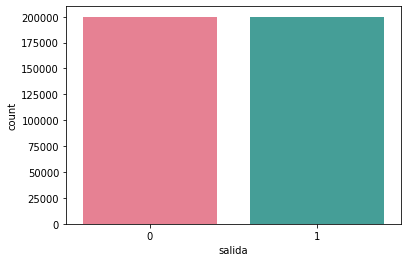

In [131]:
sns.countplot(df_2['salida'], palette='husl')

In [132]:
df_2.isnull().sum()

pendiente               0
media                   0
mediana                 0
moda                    0
varianza                0
desviacionEstandar      0
kurtosis              181
asimetria             181
salida                  0
dtype: int64

Con esta celda procedemos a eliminar los datos nulos para que no causen algun problema con nuestro modelo clasificador

In [133]:
data = df_2.copy()
data = data[data['kurtosis'].notna()]
data = data[data['asimetria'].notna()]
data.isnull().sum()

pendiente             0
media                 0
mediana               0
moda                  0
varianza              0
desviacionEstandar    0
kurtosis              0
asimetria             0
salida                0
dtype: int64

### Codigo para eliminar datos atipicos

En busca de aumentar el rendimiento del modelo se eliman los datos atipicos que tienen nuestro registro

In [134]:
def IdentificarAtipicos(df, ft, valorAlfa):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    iqr = q3 - q1
    
    bigote_inferior = q1 - valorAlfa * iqr
    bigote_superior = q3 + valorAlfa * iqr
    
    ls = df.index[(df[ft]<bigote_inferior) | (df[ft] > bigote_superior)]
    return ls

def eliminar(df, index):
    index = sorted(set(index))
    df = df.drop(index)
    return df

aux = ['pendiente','media','mediana','moda','varianza','desviacionEstandar','kurtosis','asimetria']
valor_alpha = 1.5
index_list = []
for i in aux:
  index_list.extend(IdentificarAtipicos(data, i,valor_alpha))

columnsa = ["indicesss"]
df_index = pd.DataFrame(index_list,columns = columnsa)
df_index.duplicated().sum()
df_index = df_index.drop_duplicates()
final_index_list = df_index["indicesss"]
data = eliminar(data,final_index_list)
data

,pendiente,media,mediana,moda,varianza,desviacionEstandar,kurtosis,asimetria,salida
3213512,0.436250,0.0355,-0.200,-0.205,0.255525,0.505495,2.519250,2.004274,1
3213513,-0.051111,-0.1525,-0.170,-0.195,0.002299,0.047945,2.638368,1.876600,0
3213514,1.500769,0.0775,-0.130,-0.205,0.244289,0.494256,1.955553,1.881181,1
3213515,0.392632,0.0425,-0.030,-0.125,0.030149,0.173634,2.808633,1.883387,0
3213516,1.457917,0.1020,-0.105,-0.155,0.218941,0.467911,2.109374,1.911117,1
...,...,...,...,...,...,...,...,...,...
3613501,-0.074118,-0.1470,-0.155,-0.165,0.000916,0.030265,-0.561818,0.271959,0
3613502,-7.320000,-0.0235,-0.105,-0.105,0.046513,0.215668,3.490325,2.193504,1
3613504,-17.419091,-0.0355,-0.110,-0.105,0.040855,0.202126,3.347524,2.153607,1
3613505,-1.982308,-0.0645,-0.055,-0.015,0.003195,0.056522,-0.749270,0.367385,0


In [135]:
data['salida'].value_counts()

1    187855
0     98861
Name: salida, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


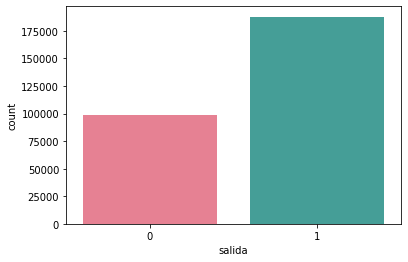

In [136]:
sns.countplot(data['salida'], palette='husl')

Al final del proceso de exploracion de información, podemos ver un desbalanceo de clases favorable a la clase 1, lo cual nos puede generar un sesgo al momento de creacion del modelo, para cuestiones practicas de este parcial se decide ignorar este problemas ya que las soluciones son temas que se salen del alcance del mismo parcial.

## Creacion del Modelo
---

Cumpliendo las indicaciones del parcial se opta por un modelo SVM y con una optimizacion de hiperparamentro que se llevo a cabo con la libreria **RandomizedSearchCV** para sacar el mejor modelo posible.

### SVM

Separar datos en conjunto de entrenamiento y prueba.

In [137]:
X_2 = data[['pendiente','media','mediana','moda','varianza','desviacionEstandar','kurtosis','asimetria']]

y_2 = data['salida']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, stratify=y_2,
                                                    train_size=0.3,
                                                    )

Crear el escalar para el modelo

In [138]:
scaler = StandardScaler()
scaler.fit(X_train_2)
x_train_2 = scaler.transform(X_train_2)

In [139]:
SVM = svm.SVC()

Definir parametros a optimizar

In [140]:
parameters = {
    'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'decision_function_shape':['ovo', 'ovr']
}

In [141]:
RDSCV_SVM = RandomizedSearchCV(SVM, 
                                       parameters,
                                       cv=5, 
                                       n_iter=3)

In [ ]:
RDSCV_SVM.fit(X_train_2, y_train_2)

Resultados del Modelo

In [ ]:
print(RDSCV_SVM.best_score_)
print(RDSCV_SVM.best_params_)

0.9955222158107329
{'kernel': 'poly', 'decision_function_shape': 'ovo'}


In [ ]:
pred_y_2 = RDSCV_SVM.predict(X_test_2)
f1_score(y_test_2, pred_y_2)

0.996334599801359

Conclusion:  
Podemos ver que logro cumplir con el desempeño objetivo del punto 1 del parcial con una eficacion del 0.996334599801359

## **Segundo Punto Esquema de Fusion**

---



Para poder hacer el esquemas de fusion de escogio realizar con modelos mas lo cuales fueron **MLPClassifier()**(NN) y **DecisionTreeClassifier()**(Arboles), este sistemas de fusion se realiza por el metodo de votacion.

### Redes Neuronales

In [ ]:
X = data[['pendiente','media','mediana','moda','varianza','desviacionEstandar','kurtosis','asimetria']]

y = data['salida']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    train_size=0.3,
                                                    )

In [ ]:
mlp_gs = MLPClassifier()

In [ ]:
parameters = {
    'hidden_layer_sizes':[(100,),(10,50,10),(20,),(100,100)],
    'activation':['logistic', 'tanh', 'relu'],
    'learning_rate_init':np.arange(0.001,0.005,0.001),
    'tol':np.arange(0.001,0.005,0.001),
    'max_iter':np.arange(200,1000,100)
}

In [ ]:

RDSCV= RandomizedSearchCV(mlp_gs, 
                                       parameters,
                                       cv=5, 
                                       n_iter=3)

In [ ]:
RDSCV.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=MLPClassifier(), n_iter=3,
                   param_distributions={'activation': ['logistic', 'tanh',
                                                       'relu'],
                                        'hidden_layer_sizes': [(100,),
                                                               (10, 50, 10),
                                                               (20,),
                                                               (100, 100)],
                                        'learning_rate_init': array([0.001, 0.002, 0.003, 0.004]),
                                        'max_iter': array([200, 300, 400, 500, 600, 700, 800, 900]),
                                        'tol': array([0.001, 0.002, 0.003, 0.004])})

In [ ]:
print(RDSCV.best_score_)
print(RDSCV.best_params_)

0.995476053087132
{'tol': 0.002, 'max_iter': 700, 'learning_rate_init': 0.003, 'hidden_layer_sizes': (10, 50, 10), 'activation': 'tanh'}


In [ ]:
pred_y = RDSCV.predict(X_test)
f1_score(y_test, pred_y)


0.9964529503570697

### Árbol de decisión

In [ ]:
X_3 = data[['pendiente','media','mediana','moda','varianza','desviacionEstandar','kurtosis','asimetria']]

y_3 = data['salida']

In [ ]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, stratify=y_3,
                                                    train_size=0.3,
                                                    )

In [ ]:
ARBOL = DecisionTreeClassifier()

In [ ]:
parameters = {'max_depth' : (3,5,7,9,10,15,20,25)
              , 'criterion' : ('gini', 'entropy')
              , 'max_features' : ('auto', 'sqrt', 'log2')
              , 'min_samples_split' : (2,4,6)
              ,'splitter' : ('best', 'random')
             }


In [ ]:
RDSCV_ARBOL  = RandomizedSearchCV(ARBOL, 
                                  param_distributions = parameters, 
                                  cv = 5, 
                                  verbose = True)

In [ ]:
RDSCV_ARBOL.fit(X_train_3,y_train_3)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (3, 5, 7, 9, 10, 15, 20,
                                                      25),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6),
                                        'splitter': ('best', 'random')},
                   verbose=True)

In [ ]:
print(RDSCV_ARBOL.best_score_)
print(RDSCV_ARBOL.best_params_)

0.9950952106174263
{'splitter': 'best', 'min_samples_split': 6, 'max_features': 'sqrt', 'max_depth': 9, 'criterion': 'gini'}


In [ ]:
pred_y_3 = RDSCV_ARBOL.predict(X_test_3)
f1_score(y_test_3, pred_y_3)

0.9959666301667703

### Esquema de fusión de detectores

In [ ]:
df_fusion = pd.DataFrame()
df_fusion['SVM_MODEL'] = pred_y_2
df_fusion['ARBOL_MODEL'] = pred_y_3
df_fusion['NN_MODEL'] = pred_y
df_fusion

,SVM_MODEL,ARBOL_MODEL,NN_MODEL
0,0,1,1
1,1,0,1
2,0,0,0
3,1,1,1
4,1,1,0
...,...,...,...
202180,0,0,1
202181,1,1,0
202182,0,1,0
202183,1,1,0


In [ ]:
from scipy.optimize import RootResults
salida_fusion = []
for index, row in df_fusion.iterrows(): 
    lista_vot = [row['SVM_MODEL'],row['ARBOL_MODEL'],row['NN_MODEL']]
    result = mode(lista_vot)
    salida_fusion.append(result)
    

In [ ]:
df_fusion['Salida'] = salida_fusion
df_fusion

,SVM_MODEL,ARBOL_MODEL,NN_MODEL,Salida
0,0,1,1,1
1,1,0,1,1
2,0,0,0,0
3,1,1,1,1
4,1,1,0,1
...,...,...,...,...
202180,0,0,1,0
202181,1,1,0,1
202182,0,1,0,0
202183,1,1,0,1


In [ ]:
f1_score(y_test_3, salida_fusion)

0.8209301713077406

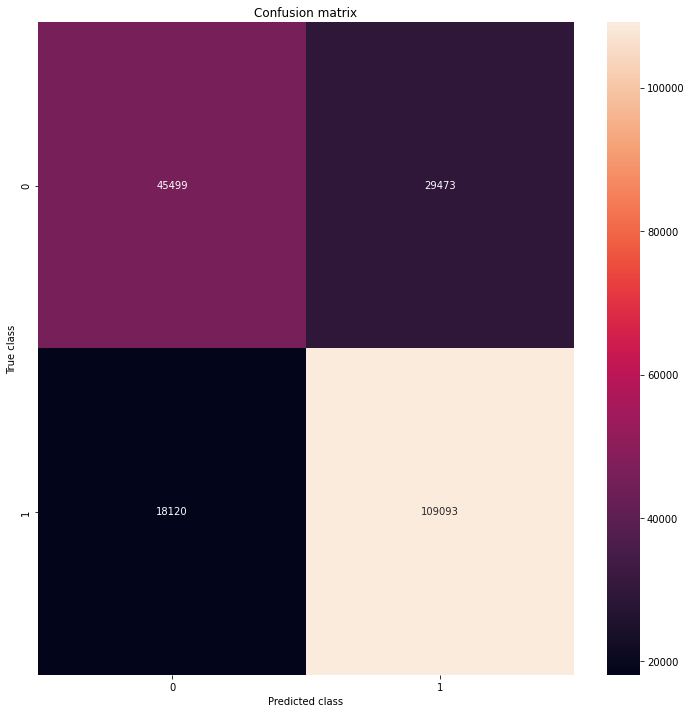

              precision    recall  f1-score   support

           0       0.72      0.61      0.66     74972
           1       0.79      0.86      0.82    127213

    accuracy                           0.76    202185
   macro avg       0.75      0.73      0.74    202185
weighted avg       0.76      0.76      0.76    202185



In [ ]:
conf_matrix = confusion_matrix(y_test_3, salida_fusion)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
print (classification_report(y_test_3, salida_fusion))

In [ ]:
f1_score(y_test_2, salida_fusion)

0.8199895401818804

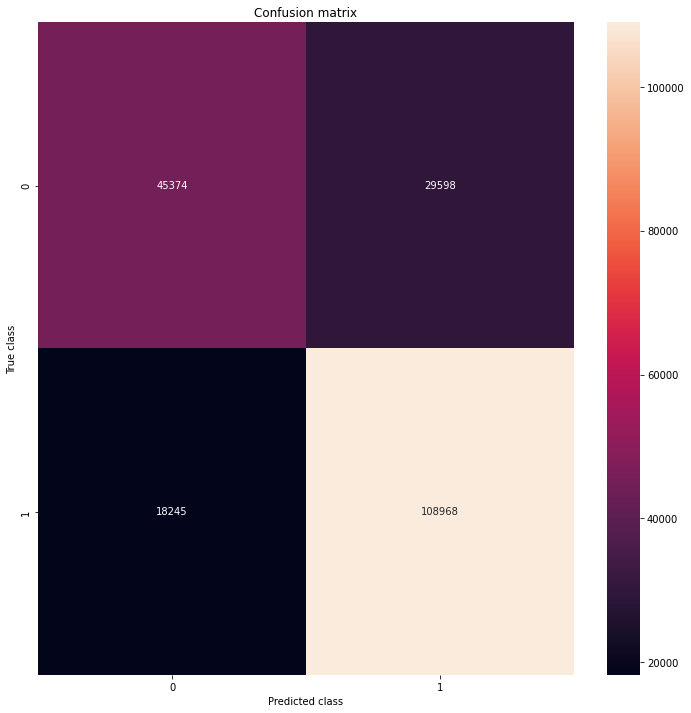

              precision    recall  f1-score   support

           0       0.71      0.61      0.65     74972
           1       0.79      0.86      0.82    127213

    accuracy                           0.76    202185
   macro avg       0.75      0.73      0.74    202185
weighted avg       0.76      0.76      0.76    202185



In [ ]:
conf_matrix = confusion_matrix(y_test_2, salida_fusion)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
print (classification_report(y_test_2, salida_fusion))

In [ ]:
f1_score(y_test, salida_fusion)

0.8205614439064034

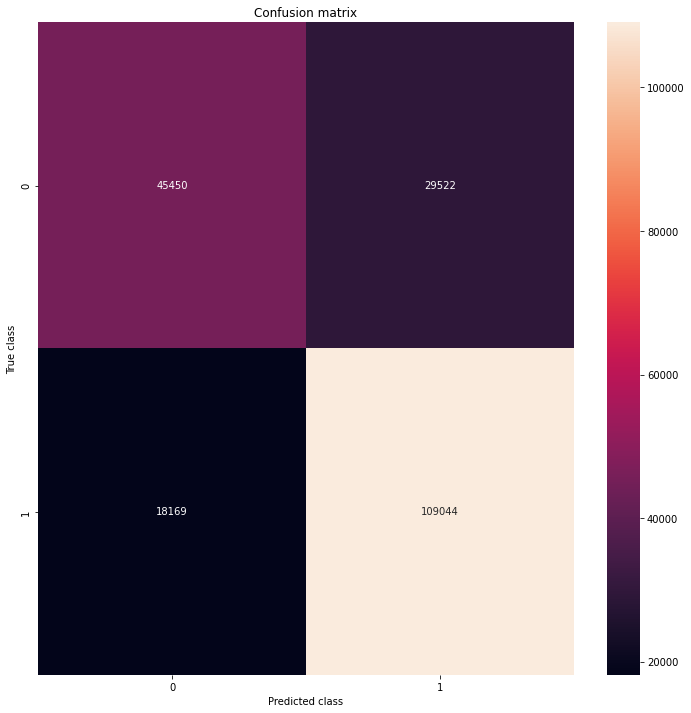

              precision    recall  f1-score   support

           0       0.71      0.61      0.66     74972
           1       0.79      0.86      0.82    127213

    accuracy                           0.76    202185
   macro avg       0.75      0.73      0.74    202185
weighted avg       0.76      0.76      0.76    202185



In [ ]:
conf_matrix = confusion_matrix(y_test, salida_fusion)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
print (classification_report(y_test, salida_fusion))

Conclusion:

Como podemos ver apoyados con solo con el score, si no con la matriz de confusion podemos ver la razon por la cual nuestro modelo en vez de mejorar a empeorado ya que el valor de los **Falsos Positivos** aumento considerablemente, lo que nos estaria generando errores de clasificación


## **Tercer Punto**

## Air Quality Prediction UCI

## Informacion del DataSet:
El conjunto de datos contiene 9358 instancias de respuestas promediadas por hora de un conjunto de 5 sensores químicos de óxido metálico integrados en un dispositivo multisensor químico de calidad del aire. El dispositivo estaba situado sobre el terreno en una zona significativamente contaminada, a nivel de carretera, dentro de una ciudad italiana. Los datos se registraron desde marzo de 2004 hasta febrero de 2005 (un año), lo que representa el mayor registro disponible de respuestas de dispositivos de sensores químicos de calidad del aire desplegados sobre el terreno. Las concentraciones medias horarias de CO, hidrocarburos no metálicos, benceno, óxidos de nitrógeno (NOx) y dióxido de nitrógeno (NO2) fueron proporcionadas por un analizador de referencia certificado. Existen evidencias de sensibilidades cruzadas, así como de derivas del concepto y del sensor, como se describe en De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (cita requerida) afectando eventualmente a la capacidad de estimación de la concentración de los sensores. Los valores perdidos se etiquetan con el valor -200.
Este conjunto de datos puede utilizarse exclusivamente con fines de investigación. Los fines comerciales están totalmente excluidos.

### Información de atributos:

0 Fecha (DD/MM/AAAA)  
1 Hora (HH.MM.SS)  
2 Concentración media horaria real de CO en mg/m^3 (analizador de referencia)  
3 Respuesta media horaria del sensor PT08.S1 (óxido de estaño) (nominalmente orientado al CO)  
4 Promedio horario real de la concentración global de hidrocarburos no metánicos en microg/m^3 (analizador de referencia)  
5 Concentración de benceno de media horaria real en microg/m^3 (analizador de referencia)  
6 Respuesta media horaria del sensor PT08.S2 (titanio) (objetivo nominal de NMHC)  
7 Concentración de NOx de media horaria real en ppb (analizador de referencia)  
8 PT08.S3 (óxido de tungsteno) respuesta media horaria del sensor (objetivo nominal de NOx)  
9 Concentración de NO2 real media horaria en microg/m^3 (analizador de referencia)  
10 PT08.S4 (óxido de tungsteno) respuesta media horaria del sensor (objetivo nominal de NO2)  
11 PT08.S5 (óxido de indio) respuesta media horaria del sensor (objetivo nominal de O3)  
12 Temperatura en Â°C  
13 Humedad relativa (%)  
14 Humedad absoluta AH  


In [ ]:
data_air = pd.read_excel('AirQualityUCI.xlsx')
data_air

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [ ]:
for (label, content) in data_air.iteritems():
  print(data_air[label].value_counts())

2004-09-21    24
2004-11-09    24
2004-12-01    24
2004-11-30    24
2004-11-29    24
              ..
2004-07-13    24
2004-07-12    24
2005-04-02    24
2005-04-04    15
2004-03-10     6
Name: Date, Length: 391, dtype: int64
18:00:00    390
05:00:00    390
14:00:00    390
13:00:00    390
12:00:00    390
11:00:00    390
10:00:00    390
09:00:00    390
08:00:00    390
07:00:00    390
19:00:00    390
06:00:00    390
04:00:00    390
03:00:00    390
02:00:00    390
01:00:00    390
00:00:00    390
23:00:00    390
22:00:00    390
21:00:00    390
20:00:00    390
15:00:00    389
16:00:00    389
17:00:00    389
Name: Time, dtype: int64
-200.0    1683
 1.0       305
 1.4       279
 1.6       275
 1.5       273
          ... 
 9.9         1
 7.6         1
 9.3         1
 7.0         1
 8.5         1
Name: CO(GT), Length: 97, dtype: int64
-200.000000     366
 1099.500000     12
 954.250000      12
 986.750000      12
 888.000000      11
               ... 
 808.000000       1
 834.333333       1
 8

In [ ]:
df = data_air.copy()
for (label, content) in df.iteritems():
    df = df.drop(df[df[label]==-200].index)
    
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,2004-04-30,20:00:00,4.4,1449.25,501,19.494597,1282.25,254.0,625.00,133.0,2099.50,1568.50,19.075,61.075001,1.334500
1227,2004-04-30,21:00:00,3.1,1362.50,234,15.100351,1151.75,189.0,683.75,110.0,1951.25,1494.75,18.200,65.350002,1.352888
1228,2004-04-30,22:00:00,3.0,1371.25,212,14.594739,1135.75,174.0,689.00,102.0,1926.75,1471.25,18.075,66.100000,1.357869
1229,2004-04-30,23:00:00,3.1,1406.25,275,13.697100,1106.75,167.0,718.25,108.0,1871.50,1383.75,17.700,66.875000,1.342218


In [ ]:
print(data_air.shape)
print(df.shape)

(9357, 15)
(827, 15)


In [ ]:
salida_etiqueta_air = []
for i in df['CO(GT)']:
  if i <= 1.0:  # Contaminacion leve
    salida_etiqueta_air.append(0)
  else:
    if i > 1.0 and i <= 4.0:
      salida_etiqueta_air.append(1)
    else:
      if i > 4.0:
        salida_etiqueta_air.append(2)

df['Salida'] = salida_etiqueta_air
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Salida
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754,1
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487,1
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239,1
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713,1
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,2004-04-30,20:00:00,4.4,1449.25,501,19.494597,1282.25,254.0,625.00,133.0,2099.50,1568.50,19.075,61.075001,1.334500,2
1227,2004-04-30,21:00:00,3.1,1362.50,234,15.100351,1151.75,189.0,683.75,110.0,1951.25,1494.75,18.200,65.350002,1.352888,1
1228,2004-04-30,22:00:00,3.0,1371.25,212,14.594739,1135.75,174.0,689.00,102.0,1926.75,1471.25,18.075,66.100000,1.357869,1
1229,2004-04-30,23:00:00,3.1,1406.25,275,13.697100,1106.75,167.0,718.25,108.0,1871.50,1383.75,17.700,66.875000,1.342218,1


In [ ]:
df['Salida'].value_counts()

1    578
0    141
2    108
Name: Salida, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


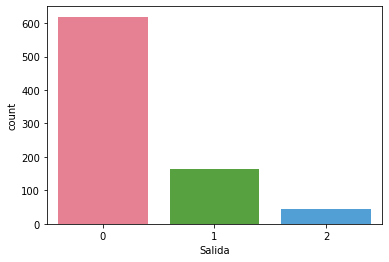

In [ ]:
sns.countplot(df['Salida'], palette='husl')

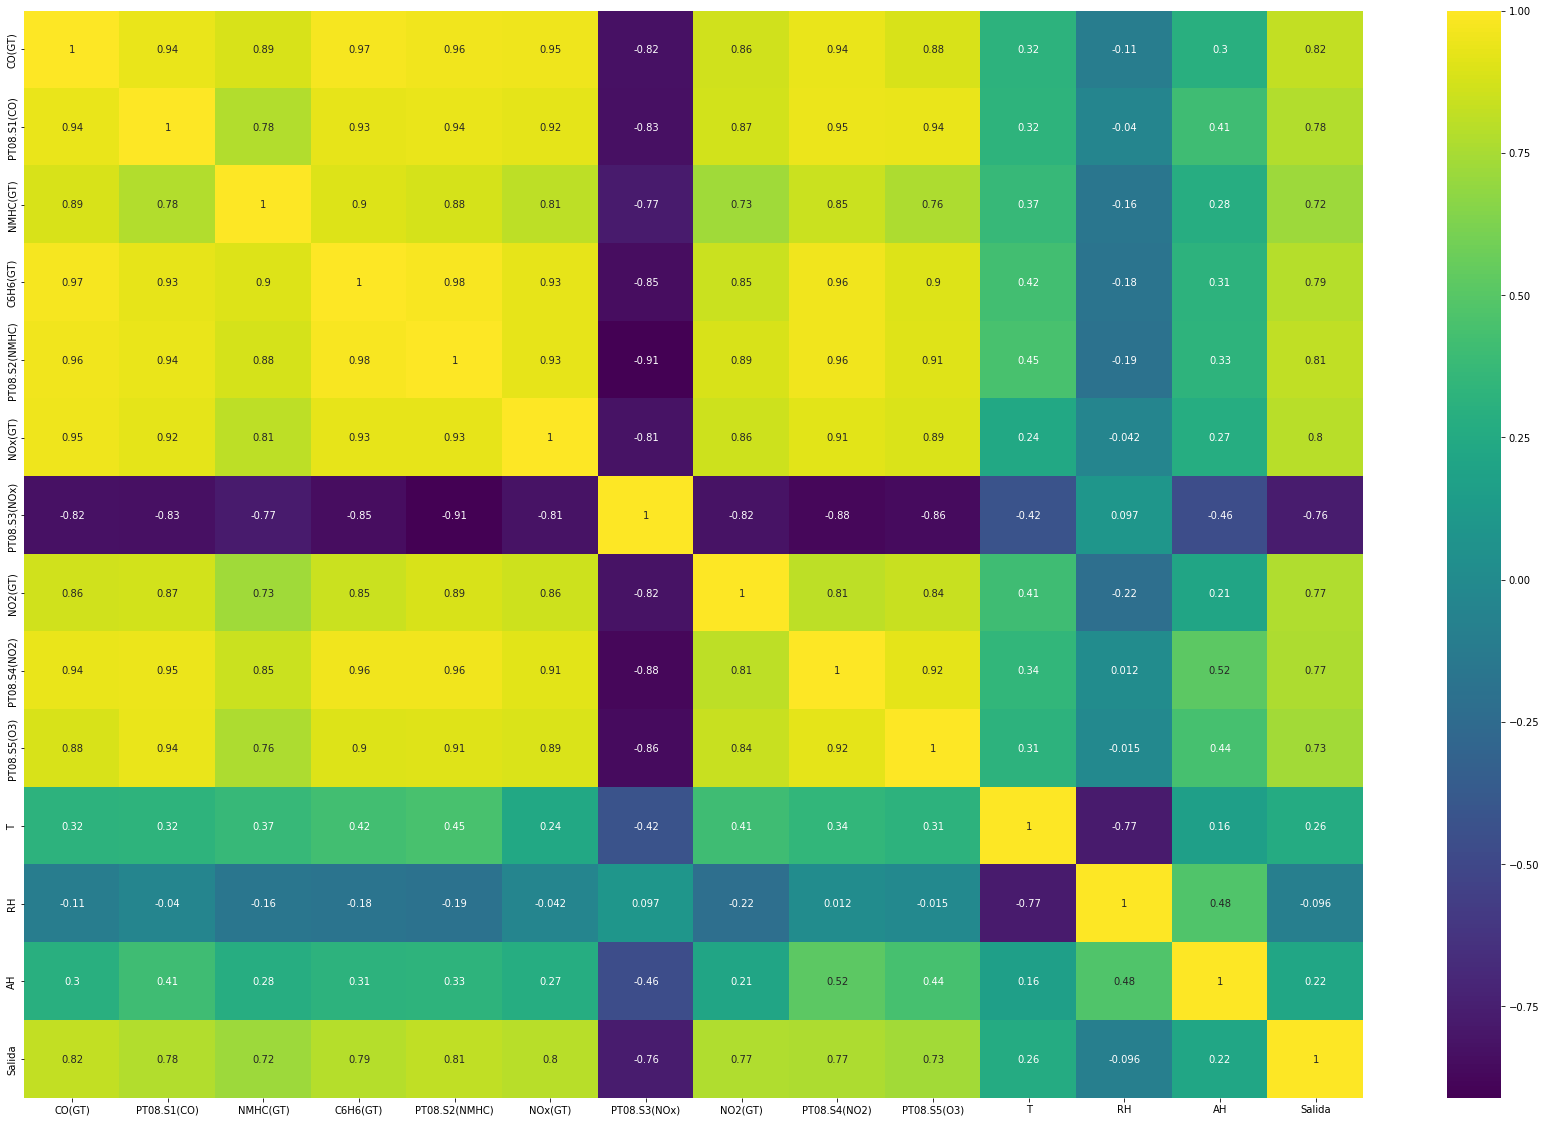

In [ ]:
corrmat=df.corr()
top_corr_feature=corrmat.index
plt.figure(figsize=(30,20))
# to plot heat map
g=sns.heatmap(df[top_corr_feature].corr(),annot=True,cmap='viridis')

In [ ]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Salida'],
      dtype='object')

### Modelo Redes Neuronales Artificiales (NN)

In [ ]:
X = df[['CO(GT)','NO2(GT)','PT08.S2(NMHC)','PT08.S1(CO)','C6H6(GT)']]  

y = df['Salida']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    train_size=0.3,
                                                    )

In [ ]:
parameters = {
    'hidden_layer_sizes':[(100,),(10,50,10),(20,),(100,100)],
    'activation':['logistic', 'tanh', 'relu'],
    'learning_rate_init':np.arange(0.001,0.005,0.001),
    'tol':np.arange(0.001,0.005,0.001),
    'max_iter':np.arange(200,1000,100)
}
mlp_gs_air = MLPClassifier()
RDSCV_air= RandomizedSearchCV(mlp_gs_air, 
                                       parameters,
                                       cv=5, 
                                       n_iter=3)
RDSCV_air.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=MLPClassifier(), n_iter=3,
                   param_distributions={'activation': ['logistic', 'tanh',
                                                       'relu'],
                                        'hidden_layer_sizes': [(100,),
                                                               (10, 50, 10),
                                                               (20,),
                                                               (100, 100)],
                                        'learning_rate_init': array([0.001, 0.002, 0.003, 0.004]),
                                        'max_iter': array([200, 300, 400, 500, 600, 700, 800, 900]),
                                        'tol': array([0.001, 0.002, 0.003, 0.004])})

In [ ]:
print(RDSCV_air.best_score_)
print(RDSCV_air.best_params_)

0.8222857142857143
{'tol': 0.003, 'max_iter': 300, 'learning_rate_init': 0.004, 'hidden_layer_sizes': (100,), 'activation': 'logistic'}


In [ ]:
pred_y_nn = RDSCV_air.predict(X_test)
f1_score(y_test, pred_y_nn,average='weighted')   

0.7065219264701129

Como no se alcanzo el puntaje objetivo para nuestro modelo se obta por intentar un esquemas de fusion para ver si se puede mejorar el rendimiento

### SVM 

In [ ]:
X_2 = df[['CO(GT)','NO2(GT)','PT08.S2(NMHC)','PT08.S1(CO)','C6H6(GT)']]  

y_2 = df['Salida']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, stratify=y_2,
                                                    train_size=0.3,
                                                    )

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train_2)
x_train_2 = scaler.transform(X_train_2)

SVM = svm.SVC()
parameters = {
    'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'decision_function_shape':['ovo', 'ovr']
}

RDSCV_SVM = RandomizedSearchCV(SVM, 
                                       parameters,
                                       cv=5, 
                                       n_iter=3)

In [ ]:
RDSCV_SVM.fit(X_train_2, y_train_2)

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=3,
                   param_distributions={'decision_function_shape': ['ovo',
                                                                    'ovr'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid', 'precomputed']})

In [ ]:
print(RDSCV_SVM.best_score_)
print(RDSCV_SVM.best_params_)

0.9234285714285713
{'kernel': 'poly', 'decision_function_shape': 'ovr'}


In [ ]:
pred_y_svm = RDSCV_SVM.predict(X_test)
f1_score(y_test, pred_y_svm,average='weighted')   

0.9138298526445897

### Arbol

In [ ]:
X_3 = df[['CO(GT)','NO2(GT)','PT08.S2(NMHC)','PT08.S1(CO)','C6H6(GT)']]  

y_3 = df['Salida']

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, stratify=y_3,
                                                    train_size=0.3,
                                                    )

In [ ]:
ARBOL = DecisionTreeClassifier()

In [ ]:
parameters = {'max_depth' : (3,5,7,9,10,15,20,25)
              , 'criterion' : ('gini', 'entropy')
              , 'max_features' : ('auto', 'sqrt', 'log2')
              , 'min_samples_split' : (2,4,6)
              ,'splitter' : ('best', 'random')
             }


In [ ]:
RDSCV_ARBOL  = RandomizedSearchCV(ARBOL, 
                                  param_distributions = parameters, 
                                  cv = 5, 
                                  verbose = True)

In [ ]:
RDSCV_ARBOL.fit(X_train_3,y_train_3)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (3, 5, 7, 9, 10, 15, 20,
                                                      25),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6),
                                        'splitter': ('best', 'random')},
                   verbose=True)

In [ ]:
print(RDSCV_ARBOL.best_score_)
print(RDSCV_ARBOL.best_params_)

0.9879999999999999
{'splitter': 'best', 'min_samples_split': 4, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'gini'}


In [ ]:
modelo = DecisionTreeClassifier(splitter='best', min_samples_split= 4, max_features= 'auto', max_depth= 10, criterion= 'gini')
modelo.fit(X_train_3,y_train_3)
pred_y_arbol = modelo.predict(X_test_3)
f1_score(y_test_3, pred_y_arbol,average='weighted')  


0.9897510314929469

### KNeighborsClassifier

In [ ]:
X_4 = df[['CO(GT)','NO2(GT)','PT08.S2(NMHC)','PT08.S1(CO)','C6H6(GT)']]  

y_4 = df['Salida']

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, stratify=y_4,
                                                    train_size=0.3,
                                                    )

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
parameters = {'n_neighbors' : (5,7,9,10,15,20,25)
              , 'weights' : ('uniform', 'distance')
              , 'algorithm' : ('auto', 'ball_tree', 'kd_tree','brute')
             }

In [ ]:
RDSCV_KNN  = RandomizedSearchCV(knn, 
                                  param_distributions = parameters, 
                                  cv = 5, 
                                  verbose = True)

In [ ]:
RDSCV_KNN.fit(X_train_4,y_train_4)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ('auto', 'ball_tree',
                                                      'kd_tree', 'brute'),
                                        'n_neighbors': (5, 7, 9, 10, 15, 20,
                                                        25),
                                        'weights': ('uniform', 'distance')},
                   verbose=True)

In [ ]:
print(RDSCV_KNN.best_score_)
print(RDSCV_KNN.best_params_)

0.931265306122449
{'weights': 'distance', 'n_neighbors': 10, 'algorithm': 'ball_tree'}


In [ ]:
pred_y_KNN = RDSCV_KNN.predict(X_test_3)
f1_score(y_test_4, pred_y_arbol,average='weighted')  

0.5588523399461092

### Naive Bayes

In [ ]:
X_5 = df[['CO(GT)','NO2(GT)','PT08.S2(NMHC)','PT08.S1(CO)','C6H6(GT)']]  

y_5 = df['Salida']

X_train_5, X_test_5,y_train_5, y_test_5 = train_test_split(X_5, y_5, stratify=y_5,
                                                    train_size=0.3,
                                                    )

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train_5,y_train_5)

GaussianNB()

In [ ]:
gnb.score(X_train_5,y_train_5)

0.9435483870967742

In [ ]:
pred_y_NV = gnb.predict(X_test_5)
f1_score(y_test_5, pred_y_NV,average='weighted')

0.8883088791379224

### Metodo de Fusion

In [ ]:
df_fusion = pd.DataFrame()
df_fusion['SVM_MODEL'] = pred_y_svm
df_fusion['ARBOL_MODEL'] = pred_y_arbol
df_fusion['NN_MODEL'] = pred_y_nn
df_fusion['KNN_MODEL'] = pred_y_KNN
df_fusion['NB_MODEL'] = pred_y_KNN
df_fusion

,SVM_MODEL,ARBOL_MODEL,NN_MODEL,KNN_MODEL,NB_MODEL
0,1,1,1,1,1
1,1,0,1,0,0
2,1,0,1,0,0
3,1,1,0,1,1
4,1,1,1,1,1
...,...,...,...,...,...
574,1,1,1,1,1
575,1,1,1,1,1
576,1,2,1,2,2
577,1,0,1,1,1


In [120]:
salida_fusion = []
for index, row in df_fusion.iterrows(): 
    lista_vot = [row['SVM_MODEL'],row['ARBOL_MODEL'],row['NN_MODEL'],row['KNN_MODEL'],row['NB_MODEL']]
    votos = modaJC(lista_vot)
    if len(votos) == 1:
      result = votos[0]
    else:
      result = random.choice(votos)

    salida_fusion.append(result)

Como se presentaban empates en algunas casos se opto que cuando sea un empate se escoja de manera aletoria el ganador para que esta sea nuestra salida.

In [122]:
df_fusion['Salida'] = salida_fusion
df_fusion

,SVM_MODEL,ARBOL_MODEL,NN_MODEL,KNN_MODEL,NB_MODEL,Salida
0,1,1,1,1,1,1
1,1,0,1,0,0,0
2,1,0,1,0,0,0
3,1,1,0,1,1,1
4,1,1,1,1,1,1
...,...,...,...,...,...,...
574,1,1,1,1,1,1
575,1,1,1,1,1,1
576,1,2,1,2,2,2
577,1,0,1,1,1,1


In [126]:

print(f1_score(y_test_3, salida_fusion,average='weighted'))


0.9529129127135731


Se logro mejorar el desempeño a comparacion de nuestro modelo con NN, gracias a el metodo de fusion